# Laboratorio de Introducción al Procesamiento de Lenguaje Natural 2017

#### Número de grupo: 13
#### Integrantes:
- Giovani Rondán, CI: 4.528.997-6
- Santiago Behak, CI: 5.019.450-0

## 1- Importación de los tweets.

Comenzaremos importando los tweets provenientes del archivo "corpus_humor_training.csv" usando la librería Pandas:

In [1]:
import pandas
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
import re
#import freeling
from pylab import *
import numpy as np
from nltk.corpus import stopwords
import IPython.display as disp
import os

corpus = pandas.read_csv("corpus_humor_training.csv",encoding='utf-8')

C:\Users\grondan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Los registros de este corpus están compuestos por varios datos además del propio texto del tweet. A continuación mostraremos la estructura del corpus y algunos de los tweets (que se encuentran en el atributo "text") a modo de ejemplo:

In [2]:
print(corpus.columns)
print ("\n")
for text in corpus['text'][:7]:
    print(text + '\n')

Index(['id', 'text', 'account_id', 'n', '1', '2', '3', '4', '5'], dtype='object')


-La semana pasada mi hijo hizo un triple salto mortal desde 20 metros de altura - ¿Es trapecista? -Era :(

-Yo ya voy por mi segundo millón de dólares... -¿!Ah, si!? -Es que el primero nunca lo hice... #fb

-Ayer fue mi cumpleaños y no me felicitaste - ¡FéÉLíCÍDáÁDÉéS! - ¿Qué haces? -Felicitarte con retraso.

No es flojera, es un estado de ahorro de energía corporal :)

- ¿Cómo te fue en matemática? -Vos sabes que soy muy pacífica - ¿Y eso qué tiene que ver? -No me gustan los problemas jajaja -Castigada - :(

"El pesimista se queja del viento; el optimista espera que cambie; el realista ajusta las velas" Feliz miércoles.

-¿Y tú desde cuando llevas pendiente? 
-Desde que mi mujer se lo encontró en el coche y le dije que era mío...



A continuación porocedemos a analizar las características del corpus obtenido, para esto obtendremos algunos datos básicos tales como la cantidad total de tweets, la cantidad de atributos de los que disponemos, la cantidad de calificaciones de los 10 tweets más calificados y la cantidad total de calificaciones.

In [3]:
cantTweets = len(corpus)
cantAtributos = len(corpus.columns)

# Imprimimos la cantidad total de tweets y la cantidad de atributos
print ("Cantidad de Tweets en el corpus: " + str(cantTweets))
print ("Cantidad de atributos en el corpus: " + str(cantAtributos))

# Imprimimos la cantidad de calificaciones de los 10 tweets mas calificados y la cantidad total de calificaciones
totalCalificaciones = 0
contador = 0
corpus["cantCalificaciones"] = [0]*len(corpus)
for i in range(0, 12106):
    calificacionesTweet =corpus.loc[i, "n"] + corpus.loc[i, "1"]  + corpus.loc[i, "2"] + corpus.loc[i, "3"] + corpus.loc[i, "4"] + corpus.loc[i, "5"]
    totalCalificaciones += calificacionesTweet
    corpus.loc[i, "cantCalificaciones"] = calificacionesTweet

print ("Lista de los diez tweets con más calificaciones:\n")
disp.display(corpus.sort_values(by = ['cantCalificaciones'], ascending = False).head(10))

Cantidad de Tweets en el corpus: 12106
Cantidad de atributos en el corpus: 9
Lista de los diez tweets con más calificaciones:



,id,text,account_id,n,1,2,3,4,5,cantCalificaciones
5879,445969156437852161,"—¿A dónde vas tan maquillada? —A una fiesta, m...",1518218509,2,6,3,2,6,2,21
8158,446273545304162304,"JAJAJAJAJAJA ¿TE ACUERDAS CUANDO... ah, no, tú...",229144847,13,2,1,4,0,0,20
10238,446423336831053824,"""Tu invades mi cabeza"" —Juanita, 10 años, tien...",229144847,4,6,4,3,2,0,19
11728,464188098780618752,#Chistetipico,124053720,17,0,0,0,1,0,18
7849,447042317480763393,"""Es imposible"" dijo el orgullo; ""es arriesgado...",1518218509,6,6,1,1,3,0,17
8966,448704341365366784,-Tenemos una relación seria. -¿Lleváis mucho t...,1518218509,1,2,4,3,3,4,17
1117,446934186889211905,"Hablo 3 idiomas: español, sarcasmos e indirectas.",1518218509,6,4,1,4,0,1,16
7037,445481775133777921,Molestar a alguien solo porque te gusta ver co...,1518218509,14,1,0,1,0,0,16
9273,445669834211069952,A mi también me castigaron por reírme mientras...,1518218509,11,3,0,0,2,0,16
4306,447613590992732160,"—En mis tiempos... —Sí, sí abuela, como digas,...",1518218509,4,1,3,4,2,1,15


Otro dato que puede resultar interesante es la cantidad de calificaciones por valor (las calificaciones no humorísiticas serán contadas con el 0).

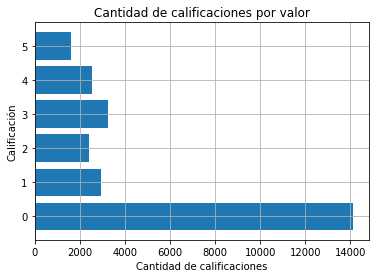

In [4]:
%matplotlib inline

# Se realiza una gráfica de cantidad de comentarios en función de su clasificación
calificacionesPorValor = [corpus["n"].sum(), corpus["1"].sum(), corpus["2"].sum(), corpus["3"].sum(), corpus["4"].sum(), corpus["5"].sum()]
valoresCalificaciones = ["0", "1", "2", "3", "4", "5"]
pos = arange(len(valoresCalificaciones)) + 0.5 

figure(1)
barh(pos,calificacionesPorValor, align='center')
yticks(pos, valoresCalificaciones)
xlabel('Cantidad de calificaciones')
ylabel(u'Calificación')
title(u'Cantidad de calificaciones por valor')
grid(True)
show()

Como se puede ver en la gráfica la mayoría de las calificaciones corresponden al valor 0, o sea, como calificaciones no humorísticas.

## 2- Preprocesmiento de los datos

En primer lugar procederemos a eleminar las columnas del corpus que consideramos innecesarias. Eliminaremos las columnas tanto de la id del tweet como la de la id del usuario. La id del tweet es un número autogenerado que no aporta información relevante ya que es completamente aleatoria y la id del usuario, si bien puede llegar a relacionarse con usuarios que tienden a emitir tweets de carácter más o menos humorístico, no es un factor concluyente para determinar el nivel de humor de un tweet particular (un mismo usuario puede hacer tweets humorísticos y no humorísticos).

In [5]:
if "id" in corpus.columns:
    del corpus["id"]
if "account_id" in corpus.columns:
    del corpus["account_id"]
print (corpus.columns)


Index(['text', 'n', '1', '2', '3', '4', '5', 'cantCalificaciones'], dtype='object')


Una vez filtradas las columnas del corpus nos disponemos a filtrar los tweets que tienen menos de tres calificaciones dado que los mismos no cuentan con una cantidad significativa de calificaciones como para ser evaluados. Además se eliminarán los hashtags de los textos de los tweets como se pide en la letra y agregaremos una nueva columna que determina si un tweet es humorístico en función del número de calificaciones no humorísticas en relación al total de calificaciones del tweet. Si la cantidad de calificaciones humorísticas es mayor o igual a la suma del resto de calificaciones el tweet se considerará no humorístico.

In [6]:
corpus["humoristico"] = [False]*len(corpus)
corpus_filtrado = pandas.DataFrame(columns = ['text', 'n', '1', '2', '3', '4', '5', 'humoristico', 'cantCalificaciones'])
#corpus_filtrado = corpus[corpus.n + corpus.columns[4] + corpus.columns[5] + corpus.columns[6] + corpus.columns[7] + corpus.columns[8] >= 3]
total = 0
for i in range(0, 12106):
    contador = corpus.loc[i, "cantCalificaciones"]
    #eliminamos los hashtags
    corpus.loc[i, "text"] = re.sub(r"#\S+\s*", "", corpus.loc[i, "text"])
    #definimos si un tweet es humoristico o no segun los votos
    if(contador/2 >= corpus.loc[i, "n"]):
        corpus.loc[i, "humoristico"] = True
    #filtramos los tweets que tienen menos de 3 votos
    if contador >= 3:
        corpus_filtrado.loc[total] = [corpus.loc[i, "text"], corpus.loc[i, "n"], corpus.loc[i, "1"], corpus.loc[i, "2"], corpus.loc[i, "3"], corpus.loc[i, "4"], corpus.loc[i, "5"], corpus.loc[i, "humoristico"], corpus.loc[i, "cantCalificaciones"]]
        total += 1
        
#columna 3 -> n, 4 -> 1, 5 -> 2, 6 -> 3, 7 -> 4, 8 -> 5

disp.display(corpus_filtrado.loc[0:10, :])
print ("Cantidad de tweets que quedan en el corpus luego del filtrado: " + str(len(corpus_filtrado)))

,text,n,1,2,3,4,5,humoristico,cantCalificaciones
0,-La semana pasada mi hijo hizo un triple salto...,0,1,1,0,0,1,True,3
1,-Yo ya voy por mi segundo millón de dólares......,2,1,0,0,0,0,False,3
2,-Ayer fue mi cumpleaños y no me felicitaste - ...,0,1,1,1,0,1,True,4
3,"No es flojera, es un estado de ahorro de energ...",1,1,1,0,0,0,True,3
4,- ¿Cómo te fue en matemática? -Vos sabes que s...,2,0,0,1,0,0,False,3
5,"-Compadre, su hija antes me daba como por las ...",1,1,0,0,1,0,True,3
6,Había una vez una tortuguita que fue a su prim...,1,2,1,0,0,0,True,4
7,"Una novia que sea tan delicada como Neymar, es...",2,0,0,0,1,0,False,3
8,¿Qué le dice el Nesquik a la leche? ¡Te voy a ...,2,1,0,0,1,0,True,4
9,Si oscar se queda me pego un tiro con un banan...,6,1,1,0,1,0,False,9


Cantidad de tweets que quedan en el corpus luego del filtrado: 3438


## 3- Separación de los datos en conjunto de train y test

A continuación dividiremos el corpus restante en un conjunto de train y en otro de test. En principio usaremos un 80% de los datos para el entrenamiento y un 20% para el testeo.

In [7]:
corpus_train, corpus_test = train_test_split(corpus_filtrado, test_size=0.2)

print ("Cantidad de tweets en el conjunto de entrenamiento: " + str(len(corpus_train)))
print ("Cantidad de tweets en el conjunto de testeo: " + str(len(corpus_test)))

Cantidad de tweets en el conjunto de entrenamiento: 2750
Cantidad de tweets en el conjunto de testeo: 688


## 4- Clasificador binario con tokenizador y POS tag de Freeling

Una vez separados el conjunto de train y test procedemos a tokenizar los tweets provenientes del conjunto train. Para esto usaremos la librería Freeling y NLTK

In [8]:
from subprocess import Popen, PIPE, STDOUT
#def tag (obj):
from funciones_auxiliares import filtrar_corpus

print("antes")
corpus_pos_tagging = filtrar_corpus(corpus_train,[])
print("despues")
#classifier = nltk.classify.NaiveBayesClassifier.train(corpus_pos_tagging)
#classifier.show_most_informative_features()

antes
previo concatenar tweets
fin concatenar tweets
previo open: 
post open
post comunicate POSTA
despues


### 4.1- Tokenización

In [9]:
from subprocess import Popen, PIPE, STDOUT

os.environ["ANALYZER"] = "/home/santiago/Descargas/FreeLing-4.0/src/main"
os.environ["FREELINGSHARE"] = "/home/santiago/Descargas/FreeLing-4.0/data/es"
comando = os.environ["ANALYZER"] + "/analyzer -f " + "/home/santiago/Descargas/FreeLing-4.0/data"

def POS_tagging(datos, largo):
    listaTuplas = []
    
    # Retorna una lista de tuplas. 
    # Cada tupla posee un diccionario (dict) palabra-frecuencia del comentario y la clasificación asociada
    # En otras palabras [(dict1, clasificacion1),(dict2, clasificacion2), ... ]

    # Se recorren los comentarios y para cada uno de ellos se tokeniza con nltk
    for i in range(1, len(datos)):
        try:
            # Se crea el diccionario asociado al comentario
            dic = {}
            
            # Por cada palabra retornada de la tokenizacion del comentario
            p = Popen(comando, shell = True, stdout=PIPE, stdin=PIPE, stderr=STDOUT)
            stdout = p.communicate(input=datos.loc[i, "text"].encode('ascii','ignore'))[0]
            for linea in stdout.decode().split('\r\n'):
                print (linea)
                token = linea.split(' ')
                tag = token[2]
                palabra = token[0]
                print (i)
                print (palabra)
                
                if((tag[0:1] != 'F') and (tag[0:2] != 'RG') and (tag[0:2] != 'DP') and (tag[0:2] != 'DT') and (tag[0:2] != 'DE') 
                    and (tag[0:2] != 'DA') and (tag[0:1] != 'N') and (tag[0:2] != 'RG') and (tag[0:2] != 'PP') and (tag[0:2] != 'PD')
                    and (tag[0:2] != 'PX') and (tag[0:2] != 'PT') and (tag[0:2] != 'PR') and (tag[0:2] != 'PE') and (tag[0:1] != 'I')
                    and (tag[0:1] != 'S') and (tag[0:1] != 'Z') and (tag[0:1] != 'W')):

                    # Si la palabra está en el diccionario del comentario, se aumenta la frecuencia
                    # En caso contrario se la pone en el diccionario con valor 1
                    if(palabra.lower() in dic): 
                        dic[palabra.lower()] = dic[palabra.lower()] + 1
                    else:
                        dic[palabra.lower()] = 1

                    # Luego de tokenizado el comentario, se agrega una tupla a la lista que contendrá
                    # el diccionario de frecuencias y la clasificaion asociada al comentario
            listaTuplas.insert(i,(dic,datos.loc[i, "humoristico"]))
        except:
            pass

    return listaTuplas

datos_test_tokenizados_pos_tagging = POS_tagging(corpus_train, len(corpus_filtrado))

The system cannot find the path specified.
1
The

The system cannot find the path specified.
2
The

The system cannot find the path specified.
3
The

The system cannot find the path specified.
4
The

The system cannot find the path specified.
6
The

The system cannot find the path specified.
7
The

The system cannot find the path specified.
8
The

The system cannot find the path specified.
9
The

The system cannot find the path specified.
10
The

The system cannot find the path specified.
11
The

The system cannot find the path specified.
12
The

The system cannot find the path specified.
14
The

The system cannot find the path specified.
15
The

The system cannot find the path specified.
16
The

The system cannot find the path specified.
17
The

The system cannot find the path specified.
18
The

The system cannot find the path specified.
19
The

The system cannot find the path specified.
20
The

The system cannot find the path specified.
21
The

The system cannot find the path specifi

The system cannot find the path specified.
203
The

The system cannot find the path specified.
205
The

The system cannot find the path specified.
206
The

The system cannot find the path specified.
208
The

The system cannot find the path specified.
209
The

The system cannot find the path specified.
210
The

The system cannot find the path specified.
211
The

The system cannot find the path specified.
212
The

The system cannot find the path specified.
213
The

The system cannot find the path specified.
214
The

The system cannot find the path specified.
216
The

The system cannot find the path specified.
219
The

The system cannot find the path specified.
220
The

The system cannot find the path specified.
221
The

The system cannot find the path specified.
222
The

The system cannot find the path specified.
223
The

The system cannot find the path specified.
224
The

The system cannot find the path specified.
225
The

The system cannot find the path specified.
227
The

The system c

The system cannot find the path specified.
407
The

The system cannot find the path specified.
408
The

The system cannot find the path specified.
409
The

The system cannot find the path specified.
411
The

The system cannot find the path specified.
412
The

The system cannot find the path specified.
414
The

The system cannot find the path specified.
415
The

The system cannot find the path specified.
416
The

The system cannot find the path specified.
417
The

The system cannot find the path specified.
418
The

The system cannot find the path specified.
420
The

The system cannot find the path specified.
421
The

The system cannot find the path specified.
422
The

The system cannot find the path specified.
423
The

The system cannot find the path specified.
424
The

The system cannot find the path specified.
427
The

The system cannot find the path specified.
428
The

The system cannot find the path specified.
429
The

The system cannot find the path specified.
430
The

The system c

The system cannot find the path specified.
619
The

The system cannot find the path specified.
620
The

The system cannot find the path specified.
621
The

The system cannot find the path specified.
622
The

The system cannot find the path specified.
623
The

The system cannot find the path specified.
624
The

The system cannot find the path specified.
625
The

The system cannot find the path specified.
626
The

The system cannot find the path specified.
627
The

The system cannot find the path specified.
628
The

The system cannot find the path specified.
629
The

The system cannot find the path specified.
630
The

The system cannot find the path specified.
631
The

The system cannot find the path specified.
632
The

The system cannot find the path specified.
633
The

The system cannot find the path specified.
634
The

The system cannot find the path specified.
635
The

The system cannot find the path specified.
636
The

The system cannot find the path specified.
637
The

The system c

The

The system cannot find the path specified.
812
The

The system cannot find the path specified.
813
The

The system cannot find the path specified.
814
The

The system cannot find the path specified.
815
The

The system cannot find the path specified.
816
The

The system cannot find the path specified.
817
The

The system cannot find the path specified.
818
The

The system cannot find the path specified.
819
The

The system cannot find the path specified.
820
The

The system cannot find the path specified.
822
The

The system cannot find the path specified.
823
The

The system cannot find the path specified.
826
The

The system cannot find the path specified.
827
The

The system cannot find the path specified.
828
The

The system cannot find the path specified.
830
The

The system cannot find the path specified.
831
The

The system cannot find the path specified.
832
The

The system cannot find the path specified.
835
The

The system cannot find the path specified.
837
The

The sys

The system cannot find the path specified.
1027
The

The system cannot find the path specified.
1028
The

The system cannot find the path specified.
1029
The

The system cannot find the path specified.
1030
The

The system cannot find the path specified.
1031
The

The system cannot find the path specified.
1032
The

The system cannot find the path specified.
1033
The

The system cannot find the path specified.
1036
The

The system cannot find the path specified.
1037
The

The system cannot find the path specified.
1038
The

The system cannot find the path specified.
1039
The

The system cannot find the path specified.
1040
The

The system cannot find the path specified.
1041
The

The system cannot find the path specified.
1042
The

The system cannot find the path specified.
1043
The

The system cannot find the path specified.
1044
The

The system cannot find the path specified.
1045
The

The system cannot find the path specified.
1046
The

The system cannot find the path specified.
104

The system cannot find the path specified.
1213
The

The system cannot find the path specified.
1215
The

The system cannot find the path specified.
1216
The

The system cannot find the path specified.
1217
The

The system cannot find the path specified.
1218
The

The system cannot find the path specified.
1219
The

The system cannot find the path specified.
1221
The

The system cannot find the path specified.
1222
The

The system cannot find the path specified.
1223
The

The system cannot find the path specified.
1224
The

The system cannot find the path specified.
1225
The

The system cannot find the path specified.
1226
The

The system cannot find the path specified.
1228
The

The system cannot find the path specified.
1229
The

The system cannot find the path specified.
1231
The

The system cannot find the path specified.
1232
The

The system cannot find the path specified.
1233
The

The system cannot find the path specified.
1236
The

The system cannot find the path specified.
123

1405
The

The system cannot find the path specified.
1406
The

The system cannot find the path specified.
1409
The

The system cannot find the path specified.
1410
The

The system cannot find the path specified.
1411
The

The system cannot find the path specified.
1412
The

The system cannot find the path specified.
1413
The

The system cannot find the path specified.
1414
The

The system cannot find the path specified.
1415
The

The system cannot find the path specified.
1416
The

The system cannot find the path specified.
1417
The

The system cannot find the path specified.
1419
The

The system cannot find the path specified.
1420
The

The system cannot find the path specified.
1421
The

The system cannot find the path specified.
1422
The

The system cannot find the path specified.
1423
The

The system cannot find the path specified.
1424
The

The system cannot find the path specified.
1425
The

The system cannot find the path specified.
1426
The

The system cannot find the path spec

The system cannot find the path specified.
1602
The

The system cannot find the path specified.
1603
The

The system cannot find the path specified.
1605
The

The system cannot find the path specified.
1609
The

The system cannot find the path specified.
1610
The

The system cannot find the path specified.
1611
The

The system cannot find the path specified.
1612
The

The system cannot find the path specified.
1613
The

The system cannot find the path specified.
1614
The

The system cannot find the path specified.
1615
The

The system cannot find the path specified.
1616
The

The system cannot find the path specified.
1617
The

The system cannot find the path specified.
1619
The

The system cannot find the path specified.
1620
The

The system cannot find the path specified.
1621
The

The system cannot find the path specified.
1623
The

The system cannot find the path specified.
1624
The

The system cannot find the path specified.
1626
The

The system cannot find the path specified.
162

The system cannot find the path specified.
1818
The

The system cannot find the path specified.
1819
The

The system cannot find the path specified.
1820
The

The system cannot find the path specified.
1821
The

The system cannot find the path specified.
1822
The

The system cannot find the path specified.
1823
The

The system cannot find the path specified.
1824
The

The system cannot find the path specified.
1825
The

The system cannot find the path specified.
1826
The

The system cannot find the path specified.
1827
The

The system cannot find the path specified.
1829
The

The system cannot find the path specified.
1830
The

The system cannot find the path specified.
1831
The

The system cannot find the path specified.
1832
The

The system cannot find the path specified.
1833
The

The system cannot find the path specified.
1834
The

The system cannot find the path specified.
1835
The

The system cannot find the path specified.
1836
The

The system cannot find the path specified.
183

The system cannot find the path specified.
2029
The

The system cannot find the path specified.
2030
The

The system cannot find the path specified.
2031
The

The system cannot find the path specified.
2032
The

The system cannot find the path specified.
2033
The

The system cannot find the path specified.
2034
The

The system cannot find the path specified.
2035
The

The system cannot find the path specified.
2037
The

The system cannot find the path specified.
2040
The

The system cannot find the path specified.
2041
The

The system cannot find the path specified.
2042
The

The system cannot find the path specified.
2043
The

The system cannot find the path specified.
2044
The

The system cannot find the path specified.
2045
The

The system cannot find the path specified.
2046
The

The system cannot find the path specified.
2047
The

The system cannot find the path specified.
2048
The

The system cannot find the path specified.
2051
The

The system cannot find the path specified.
205

The system cannot find the path specified.
2219
The

The system cannot find the path specified.
2220
The

The system cannot find the path specified.
2221
The

The system cannot find the path specified.
2222
The

The system cannot find the path specified.
2224
The

The system cannot find the path specified.
2225
The

The system cannot find the path specified.
2226
The

The system cannot find the path specified.
2227
The

The system cannot find the path specified.
2228
The

The system cannot find the path specified.
2229
The

The system cannot find the path specified.
2230
The

The system cannot find the path specified.
2232
The

The system cannot find the path specified.
2233
The

The system cannot find the path specified.
2237
The

The system cannot find the path specified.
2239
The

The system cannot find the path specified.
2241
The

The system cannot find the path specified.
2242
The

The system cannot find the path specified.
2243
The

The system cannot find the path specified.
224

The system cannot find the path specified.
2423
The

The system cannot find the path specified.
2425
The

The system cannot find the path specified.
2426
The

The system cannot find the path specified.
2427
The

The system cannot find the path specified.
2429
The

The system cannot find the path specified.
2433
The

The system cannot find the path specified.
2434
The

The system cannot find the path specified.
2435
The

The system cannot find the path specified.
2436
The

The system cannot find the path specified.
2437
The

The system cannot find the path specified.
2441
The

The system cannot find the path specified.
2442
The

The system cannot find the path specified.
2443
The

The system cannot find the path specified.
2444
The

The system cannot find the path specified.
2445
The

The system cannot find the path specified.
2447
The

The system cannot find the path specified.
2448
The

The system cannot find the path specified.
2450
The

The system cannot find the path specified.
245

The system cannot find the path specified.
2621
The

The system cannot find the path specified.
2625
The

The system cannot find the path specified.
2626
The

The system cannot find the path specified.
2627
The

The system cannot find the path specified.
2628
The

The system cannot find the path specified.
2629
The

The system cannot find the path specified.
2630
The

The system cannot find the path specified.
2631
The

The system cannot find the path specified.
2632
The

The system cannot find the path specified.
2634
The

The system cannot find the path specified.
2635
The

The system cannot find the path specified.
2636
The

The system cannot find the path specified.
2637
The

The system cannot find the path specified.
2638
The

The system cannot find the path specified.
2639
The

The system cannot find the path specified.
2640
The

The system cannot find the path specified.
2641
The

The system cannot find the path specified.
2642
The

The system cannot find the path specified.
264

In [10]:
import os
for i in os.environ:
    print i

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int i)? (<ipython-input-10-af8780939b26>, line 3)

In [ ]:
for x in datos_test_tokenizados_pos_tagging[0][0]:
    print (str(x) + ':' + str(datos_test_tokenizados_pos_tagging[0][0][x]))